In [1]:
#Tải data số 2
!gdown --id 1xmaX9QHTWnKe58oIMT1ohnhPLU15WQ2O

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1xmaX9QHTWnKe58oIMT1ohnhPLU15WQ2O
To: /content/House_Price_2.csv
100% 2.46k/2.46k [00:00<00:00, 2.36MB/s]


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [73]:
df = pd.read_csv("House_Price_2.csv")
df

,width,length,price
0,28,97,3.350184e+08
1,21,62,2.298295e+08
2,27,64,2.603552e+08
3,5,92,2.064708e+08
4,13,84,2.339808e+08
...,...,...,...
95,23,94,3.055955e+08
96,10,69,1.890808e+08
97,11,35,1.305380e+08
98,8,66,1.701948e+08


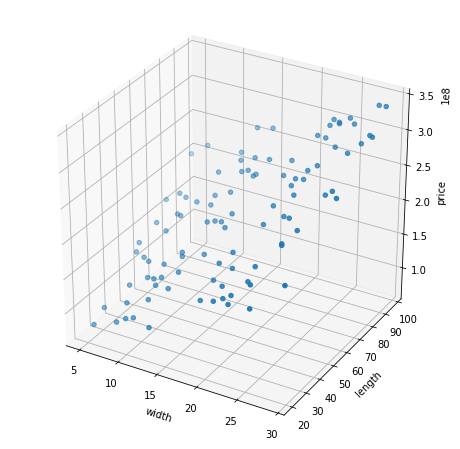

In [12]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')

ax.scatter(df["width"], df["length"], df["price"])
ax.set_xlabel('width')
ax.set_ylabel('length')
ax.set_zlabel('price')

plt.show()

Dự đoán $\hat{y} = aX + bY + c$ với $a$, $b$ và $c$ là số thực

In [24]:
y = df['price'].values   ## Trích giá tiền 
y = y.reshape(-1,1)

X = df['width'].values    ## trích width thành một mảng numpy
X = X.reshape(-1, 1)

Y = df['length'].values    ## trích length thành một mảng numpy
Y = Y.reshape(-1, 1) 

Z = np.concatenate([X, Y, np.ones((len(df),1))], axis=-1)   ## thêm một cột vào sau X + Y và gán vào Z
Z = Z.astype(np.float32)

print(Z)

[[28. 97.  1.]
 [21. 62.  1.]
 [27. 64.  1.]
 [ 5. 92.  1.]
 [13. 84.  1.]
 [ 6. 62.  1.]
 [14. 60.  1.]
 [22. 72.  1.]
 [29. 84.  1.]
 [29. 60.  1.]
 [18. 37.  1.]
 [20. 32.  1.]
 [15. 96.  1.]
 [23. 58.  1.]
 [29. 86.  1.]
 [26. 50.  1.]
 [25. 83.  1.]
 [ 7. 73.  1.]
 [24. 92.  1.]
 [23. 65.  1.]
 [14. 79.  1.]
 [23. 33.  1.]
 [15. 47.  1.]
 [ 8. 46.  1.]
 [23. 88.  1.]
 [16. 61.  1.]
 [25. 94.  1.]
 [24. 56.  1.]
 [12. 48.  1.]
 [14. 71.  1.]
 [13. 60.  1.]
 [11. 30.  1.]
 [10. 25.  1.]
 [28. 84.  1.]
 [28. 63.  1.]
 [20. 26.  1.]
 [ 5. 24.  1.]
 [26. 91.  1.]
 [20. 39.  1.]
 [23. 38.  1.]
 [18. 41.  1.]
 [20. 81.  1.]
 [20. 75.  1.]
 [10. 39.  1.]
 [25. 45.  1.]
 [ 9. 25.  1.]
 [ 9. 40.  1.]
 [15. 83.  1.]
 [25. 23.  1.]
 [ 8. 31.  1.]
 [13. 40.  1.]
 [27. 80.  1.]
 [ 7. 93.  1.]
 [28. 30.  1.]
 [16. 56.  1.]
 [12. 68.  1.]
 [ 9. 63.  1.]
 [ 8. 58.  1.]
 [22. 27.  1.]
 [22. 88.  1.]
 [12. 48.  1.]
 [ 7. 48.  1.]
 [ 5. 55.  1.]
 [ 8. 72.  1.]
 [11. 39.  1.]
 [16. 78.  1.]
 [22. 25. 

In [52]:
result = np.matmul(  np.matmul(  np.linalg.inv(  np.matmul(Z.T, Z)  ), Z.T  ), y)
a, b, c = result[0][0], result[1][0], result[2][0]
print('a =', a)
print('b =', b)
print('c =', c)

a = 4992436.840858215
b = 1997577.1805916824
c = 844955.4346069284


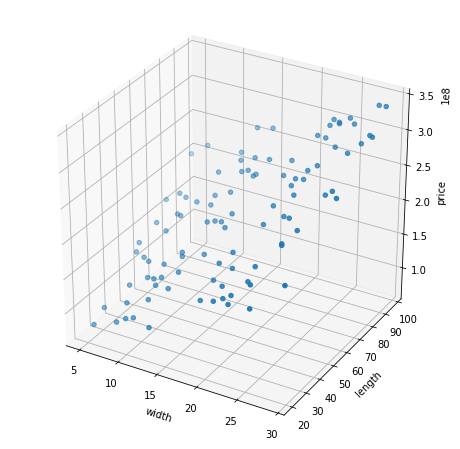

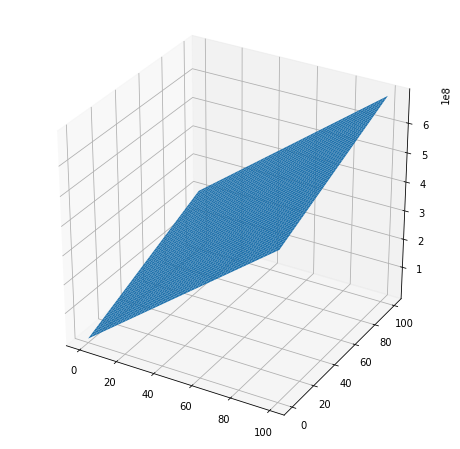

In [68]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')

ax.scatter(df["width"], df["length"], df["price"])
ax.set_xlabel('width')
ax.set_ylabel('length')
ax.set_zlabel('price')

plt.show()

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')

A, B = np.meshgrid(np.linspace(0,100), np.linspace(0,100))
C = a*A + b*B + c
ax.plot_surface(A, B, C)

plt.show()

In [72]:
# TESTING
test_1  = a*5 + b*10 + c
test_2  = a*20 + b*20 + c
test_3  = a*10 + b*40 + c

print('Predict price of house with width = 5, length = 10: %f'  %(test_1))
print('Predict price of house with width = 20, length = 20: %f'  %(test_2))
print('Predict price of house with width = 10, length = 40: %f'  %(test_3))

Predict price of house with width = 5, length = 10: 45782911.444815
Predict price of house with width = 20, length = 20: 140645235.863605
Predict price of house with width = 10, length = 40: 130672411.066856
